# Name : Akash Chandrasekar
# ID : 8947100

In [16]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

In [17]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


trainindata shape (60000, 28, 28)
number of training samples 60000
number of testing samples 10000
each image's shape (28, 28)
unique labels in the datase [0 1 2 3 4 5 6 7 8 9]


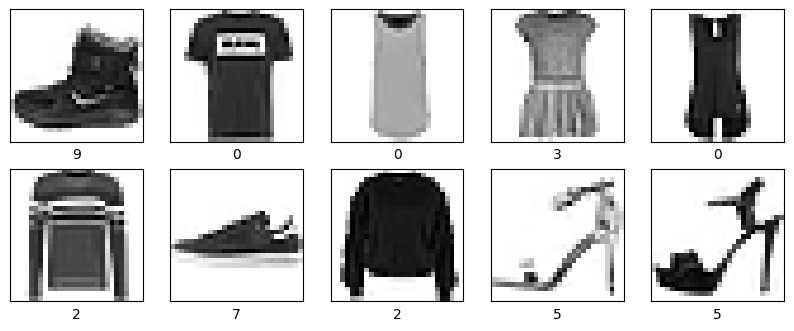

In [18]:
print("trainindata shape", train_images.shape)
print("number of training samples", len(train_labels))
print("number of testing samples", len(test_labels))
print("each image's shape", train_images[0].shape)
print("unique labels in the datase", np.unique(train_labels))
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4980 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3759 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3370 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3132 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2951 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2800 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2676 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2566 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2479 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('test accuracy', test_acc)

313/313 - 1s - loss: 0.3341 - accuracy: 0.8827 - 587ms/epoch - 2ms/step
test accuracy 0.8827000260353088


313/313 [==============================] - 0s 803us/step


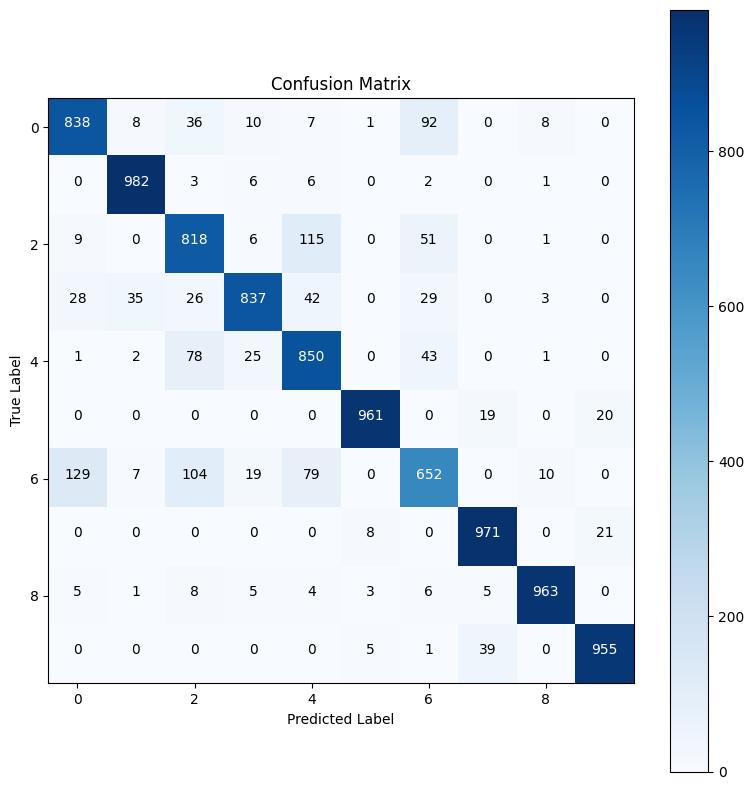

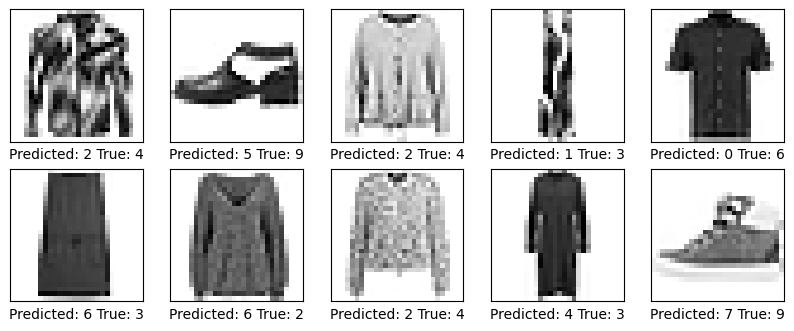

In [21]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

misclassified_idxs = np.where(predicted_labels != test_labels)[0]
plt.figure(figsize=(10,10))
for i, misclassified_idx in enumerate(misclassified_idxs[:10]):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[misclassified_idx], cmap=plt.cm.binary)
    plt.xlabel("Predicted: {} True: {}".format(predicted_labels[misclassified_idx], test_labels[misclassified_idx]))
plt.show()
